In [110]:
# To install pillow
!pip install Pillow




In [113]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [114]:
# Import relevant libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import numpy as np
from scipy.spatial import cKDTree
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.ticker as ticker
import pickle
import scipy.stats as stats
from PIL import Image

Import train dataset

In [115]:
# Load dataset
hdb=pd.read_csv('train.csv')

C:\Users\Dora Tay\AppData\Local\Temp\ipykernel_23880\3852643123.py:2: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb=pd.read_csv('train.csv')


Read first 5 lines of dataset

In [116]:

hdb.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [117]:
# Set view options for output in python
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Obtain number of columns and rows in dataset

In [118]:
hdb.shape
print(f"There are {hdb.shape[0]} rows and {hdb.shape[1]} columns.")

There are 150634 rows and 78 columns.


Check for null values in dataset

In [119]:
hdb.isnull().sum().sort_values(ascending=False)

Hawker_Within_500m           97390
Mall_Within_500m             92789
Hawker_Within_1km            60868
Hawker_Within_2km            29202
Mall_Within_1km              25426
Mall_Within_2km               1940
Mall_Nearest_Distance          829
storey_range                     0
id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
mid_storey                       0
Tranc_Month                      0
Tranc_Year                       0
resale_price                     0
lease_commence_date              0
flat_model                       0
floor_area_sqm                   0
lower                            0
max_floor_lvl                    0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft      

Display the datatype of columns in dataset

In [120]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

<hr>

### Observations

For null values in columns denoting number of hawker centres and malls that are nearest or within a certain distance, have imput with '0'.

<hr>

In [121]:
hdb['Hawker_Within_500m'] = hdb['Hawker_Within_500m'].fillna(0)
hdb['Mall_Within_500m'] = hdb['Mall_Within_500m'].fillna(0)
hdb['Hawker_Within_1km'] = hdb['Hawker_Within_1km'].fillna(0)
hdb['Hawker_Within_2km'] = hdb['Hawker_Within_2km'].fillna(0)
hdb['Mall_Within_1km'] = hdb['Mall_Within_1km'].fillna(0)
hdb['Mall_Within_2km'] = hdb['Mall_Within_2km'].fillna(0)
hdb['Mall_Nearest_Distance'] = hdb['Mall_Nearest_Distance'].fillna(0)

Check again if any null values observed

In [122]:
hdb.isnull().sum().sort_values(ascending=False)

id                           0
Tranc_YearMonth              0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
resale_price                 0
Tranc_Year                   0
Tranc_Month                  0
mid_storey                   0
lower                        0
upper                        0
mid                          0
full_flat_type               0
address                      0
floor_area_sqft              0
price_per_sqft               0
hdb_age                      0
max_floor_lvl                0
year_completed               0
residential                  0
commercial                   0
market_hawker                0
multistorey_carpark          0
precinct_pavilion            0
total_dwelling_units         0
1room_sold                   0
2room_sold                   0
3room_so

Create calculated column for number of years of lease left

In [123]:
hdb['yr_lease_used'] = hdb['Tranc_Year']-hdb['lease_commence_date']
hdb['yr_lease_left'] = 99 - hdb['yr_lease_used']

Create calculate column for percentage of sold units

In [124]:

# Using '1/2/3/4/5room_sold' and exec_sold, and multigen_sold, studio_apartment_sold 
# Sum of all / total_dwelling_units
hdb['sum_sold'] = hdb['1room_sold']+hdb['2room_sold']+hdb['3room_sold']+hdb['4room_sold']+hdb['5room_sold']+hdb['exec_sold']+hdb['multigen_sold']+hdb['studio_apartment_sold']

hdb['percentage_sold'] = hdb['sum_sold'] / hdb['total_dwelling_units']
hdb['percentage_sold'] = hdb['percentage_sold'].round(4)

Check percentage of sold units

In [125]:
print(hdb['percentage_sold'].unique())
print(hdb['percentage_sold'].describe())

[1.     0.9965 0.9897 0.9783 0.9949 0.2342 0.9947 0.8938 0.9938 0.9951
 0.9915 0.9962 0.9935 0.9916 0.9944 0.9762 0.9924 0.1303 0.9946 0.9942
 0.95   0.993  0.9954 0.9894 0.982  0.7094 0.9948 0.8889 0.9868 0.9957
 0.9905 0.9899 0.9777 0.9932 0.9831 0.9953 0.4167 0.9895 0.9892 0.9933
 0.2024 0.9798 0.9864 0.9929 0.3682 0.9809 0.2083 0.9939 0.9828 0.975
 0.9959 0.475  0.6435 0.9188 0.9934 0.9886 0.9943 0.3417 0.55   0.9956
 0.99   0.9784 0.9846 0.9912 0.3352 0.9919 0.8125 0.2906 0.9922 0.9862
 0.9832 0.9907 0.9923 0.5195 0.9667 0.9804 0.9914 0.9906 0.9979 0.9819
 0.9858 0.9931 0.42   0.6322 0.3188 0.9722 0.9882 0.9823 0.9898 0.9909
 0.9917 0.4928 0.9961 0.9928 0.2381 0.9712 0.2841 0.25   0.1649 0.9952
 0.3737 0.3681 0.9904 0.9936 0.9808 0.2917 0.1818 0.1325 0.9873 0.9842
 0.2159 0.9857 0.9674 0.8387 0.9908 0.9084 0.51   0.6547 0.8214 0.994
 0.9941 0.9821 0.9833 0.5429 0.45   0.3688 0.9875 0.9869 0.9221 0.9844
 0.973  0.9958 0.375  0.9918 0.256  0.1577 0.9806 0.9744 0.9583 0.3792
 0.907  

Create bins to categorise story_range using 'upper". Based on storey_range, 04 to 06 is most frequent, using upper, 75th percentile is 12 storey.

In [126]:
def storey_bin(row):
    if row['upper'] < 6:
        return "low_floor"
    elif row['upper'] < 12:
        return "mid_floor"
    else:
        return "high_floor"
hdb['storey_category'] = hdb.apply(storey_bin, axis=1)

Create bins for cutoff_point
Split into 2 categories based on 210 which is the mean cutoff_point

In [127]:
def cutoff_bin(row):
    if row['cutoff_point'] < 210:
        return "less_rigor"
    else:
        return "high_rigor"
hdb['sec_sch_category'] = hdb.apply(cutoff_bin, axis=1)

Drop columns that are not required for linear regression

In [128]:
hdb.drop(['town','block','street_name','flat_model','mid_storey','lower','upper','mid','full_flat_type',
'address','hdb_age','year_completed','residential','1room_rental','2room_rental','3room_rental', 
'other_room_rental','hawker_food_stalls','hawker_market_stalls','mrt_name','mrt_latitude',
'mrt_longitude','bus_stop_name','bus_stop_latitude','bus_stop_longitude','vacancy',
'pri_sch_affiliation','pri_sch_latitude','pri_sch_longitude','sec_sch_name','affiliation',
'sec_sch_latitude','sec_sch_longitude','storey_range','cutoff_point','price_per_sqft'], axis=1, inplace=True)


Drop columns used for calculated columns that are not required for linear regression

In [129]:
hdb.drop(['sum_sold', 'Tranc_YearMonth','floor_area_sqm','lease_commence_date','Tranc_Year',
'Tranc_Month','max_floor_lvl','total_dwelling_units','1room_sold','2room_sold','3room_sold','4room_sold',
'5room_sold','exec_sold','multigen_sold','studio_apartment_sold'], axis=1, inplace=True)

Observe dataset again after cleaning

In [130]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   flat_type                  150634 non-null  object 
 2   resale_price               150634 non-null  float64
 3   floor_area_sqft            150634 non-null  float64
 4   commercial                 150634 non-null  object 
 5   market_hawker              150634 non-null  object 
 6   multistorey_carpark        150634 non-null  object 
 7   precinct_pavilion          150634 non-null  object 
 8   postal                     150634 non-null  object 
 9   Latitude                   150634 non-null  float64
 10  Longitude                  150634 non-null  float64
 11  planning_area              150634 non-null  object 
 12  Mall_Nearest_Distance      150634 non-null  float64
 13  Mall_Within_500m           15

<hr>

### Observation

Dropped variables that are not relevant for predictive model. 

Next steps: preparation of data before modelling. 

1. One hot encoding:`flat_type`, `storey_category`, `pri_sch_category`

2. Convert to 1-0: `commercial`, `market_hawker`, `multistorey_carpark`, `precinct_pavilion`.

3. Initialize list for top primary schools. One hot encoding for `super_pri`.

4. Connect data for shopping mall names and performance. One hot encoding for `super_mall`.

5. Correlation matrix to observe colinearity and reduce variables if necessary.

Note: Ignore for regression: `id`, `postal`, `latitude`, `longtitude`, `yr_lease_used`

<hr>

One hot encoding for `flat_type`

In [131]:
encoder_flat_type = OneHotEncoder(sparse_output=False)
encoded_flat_type = encoder_flat_type.fit_transform(hdb[['flat_type']])
encoded_df_flat_type = pd.DataFrame(encoded_flat_type, columns=encoder_flat_type.get_feature_names_out(['flat_type']))

One hot encoding for `storey_category`

In [132]:

encoder_storey_type = OneHotEncoder(sparse_output=False)
encoded_storey_type = encoder_storey_type.fit_transform(hdb[['storey_category']])
encoded_df_storey_type = pd.DataFrame(encoded_storey_type, columns=encoder_storey_type.get_feature_names_out(['storey_category']))

One hot encoding for `sec_sch_category`

In [133]:

encoder_sec_sch_type = OneHotEncoder(sparse_output=False)
encoded_sec_sch_type = encoder_sec_sch_type.fit_transform(hdb[['sec_sch_category']])
encoded_df_sec_sch_type = pd.DataFrame(encoded_sec_sch_type, columns=encoder_sec_sch_type.get_feature_names_out(['sec_sch_category']))

One hot encoding for planning_area

In [134]:
encoder_area_type = OneHotEncoder(sparse_output=False)
encoded_area_type = encoder_area_type.fit_transform(hdb[['planning_area']])
encoded_df_area_type = pd.DataFrame(encoded_area_type, columns=encoder_area_type.get_feature_names_out(['planning_area']))

Converting columns with values Y/N to 1/0

In [135]:
hdb['commercial'] = hdb['commercial'].map({'Y': 1, 'N': 0})
hdb['market_hawker'] = hdb['market_hawker'].map({'Y': 1, 'N': 0})
hdb['multistorey_carpark'] = hdb['multistorey_carpark'].map({'Y': 1, 'N': 0})
hdb['precinct_pavilion'] = hdb['precinct_pavilion'].map({'Y': 1, 'N': 0})

Merge dataframes after encoding categorical data

In [136]:
hdb_df = pd.concat([hdb, encoded_df_flat_type,encoded_df_storey_type,encoded_df_sec_sch_type,encoded_df_area_type], axis=1)

# Drop original categories
hdb_df.drop(['flat_type', 'storey_category', 'sec_sch_category','planning_area'], axis=1, inplace=True)


Create list of schools considered as top schools. Query to join top list. Create Super school column to match 'pri_sch_name' with 'top_list'

In [137]:
top_list = ['Ai Tong School','Holy Innocents Primary School','Nanyang Primary School','Nan Hua Primary School',
            'St. Hilda Primary School','Catholic High School','CHIJ St. Nicholas Girls School',
            'Singapore Chinese Girls Primary School','Rulang Primary School','Methodist Girls School',
            'Tao Nan School','Pei Hwa Presbyterian Primary School','Rosyth School',
            'Fairfield Methodist School','Anglo-Chinese School','Henry Park Primary School',
            'Red Swastika School','South View Primary School','Anglo-Chinese School',
            'Raffles Girls Primary School']

query = '|'.join(top_list)

hdb_df['super_pri'] = hdb_df['pri_sch_name'].str.contains(query)

Convert 'super_pri' to integer type

In [138]:
hdb_df['super_pri'] = hdb_df['super_pri'].astype(int)

Load shopping mall dataset (Source:kaggle)

In [139]:
mall=pd.read_csv('shopping_mall_coordinates-20250715-023817.csv')

First 5 rows of shopping mall dataset

In [140]:
mall.head()

,shopping_mall_coordinates,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Mall Name,LATITUDE,LONGITUDE,">4.4 reviews, and 10K ratings (on google)"
1,313@Somerset,1.301014364,103.8383607,Y
2,Clarke Quay,1.2906,103.8465,Y
3,IMM,1.334875261,103.7468948,Y
4,ION Orchard,1.303992869,103.8319889,Y


Set the first row as header and drop it from the data.
Check column names.
Keep only the relevant columns.
Reset the index.
Preview cleaned data.

In [141]:

mall.columns = mall.iloc[0]
mall = mall[1:]

print(mall.columns)

mall = mall[['Mall Name', 'LATITUDE', 'LONGITUDE', '>4.4 reviews, and 10K ratings (on google)']]

mall.reset_index(drop=True, inplace=True)

mall.head(20)


Index(['Mall Name', 'LATITUDE', 'LONGITUDE', '>4.4 reviews, and 10K ratings (on google)'], dtype='object', name=0)


,Mall Name,LATITUDE,LONGITUDE,">4.4 reviews, and 10K ratings (on google)"
0,313@Somerset,1.301014364,103.8383607,Y
1,Clarke Quay,1.2906,103.8465,Y
2,IMM,1.334875261,103.7468948,Y
3,ION Orchard,1.303992869,103.8319889,Y
4,Paragon Shopping Centre,1.304,103.8361,Y
5,Plaza Singapura,1.300820718,103.8450673,Y
6,Raffles City,1.29397671,103.8533336,Y
7,Suntec City,1.293501325,103.8573075,Y
8,Takashimaya Shopping Centre,1.3026,103.8346,Y
9,VivoCity,1.2647,103.8232,Y


Define function to find distance of nearest mall (in meters).Define function to count number of malls within radius (500m, 1km, etc.)

In [142]:
def get_nearest_mall_distance(hdb_lat, hdb_lon):
    hdb_coord = (hdb_lat, hdb_lon)
    return min(geodesic(hdb_coord, mall_coord).meters for mall_coord in mall_coords)

def count_malls_within_radius(hdb_lat, hdb_lon, radius):
    hdb_coord = (hdb_lat, hdb_lon)
    return sum(geodesic(hdb_coord, mall_coord).meters <= radius for mall_coord in mall_coords)


Calculate distances and index to all malls using KDTree. Initalise list of HDB and mall coordinates.
Calculate nearest mall info.Add to HDB dataframe. Get mall names or IDs from 'mall' DataFrame using the indices

In [143]:
def calculate_nearest_mall_info(hdb_coords, mall_coords):
    mall_tree = cKDTree(mall_coords)
    distances, indices = mall_tree.query(hdb_coords, k=1)
    return distances, indices

hdb_coords = list(zip(hdb['Latitude'], hdb['Longitude']))
mall_coords = list(zip(mall['LATITUDE'], mall['LONGITUDE']))

distances, indices = calculate_nearest_mall_info(hdb_coords, mall_coords)

hdb_df['nearest_mall_distance'] = distances

hdb_df['nearest_mall_name'] = mall.iloc[indices]['Mall Name'].values
hdb_df['nearest_super'] = mall.iloc[indices]['>4.4 reviews, and 10K ratings (on google)'].values

# Show result
hdb_df[['id', 'nearest_mall_name', 'nearest_mall_distance','nearest_super']].sort_values(by=['nearest_super'], ascending=False)


,id,nearest_mall_name,nearest_mall_distance,nearest_super
3745,69777,VivoCity,0.014349,Y
32376,142409,IMM,0.006044,Y
114345,18876,VivoCity,0.014349,Y
13398,47550,VivoCity,0.008919,Y
139970,122815,VivoCity,0.010714,Y
...,...,...,...,...
50428,149067,Wisteria Mall,0.004652,N
50429,11894,JCube,0.005806,N
50430,184104,Sun Plaza,0.004051,N
50431,5738,The Star Vista,0.012209,N


Convert `nearest_super` to 1/0

In [144]:
hdb_df['super_mall'] = hdb_df['nearest_super'].map({'Y': 1, 'N': 0})

Show result

In [145]:
hdb_df[['id', 'nearest_mall_name','nearest_super','super_mall']].sort_values(by=['nearest_super'], ascending=False)

,id,nearest_mall_name,nearest_super,super_mall
3745,69777,VivoCity,Y,1
32376,142409,IMM,Y,1
114345,18876,VivoCity,Y,1
13398,47550,VivoCity,Y,1
139970,122815,VivoCity,Y,1
...,...,...,...,...
50428,149067,Wisteria Mall,N,0
50429,11894,JCube,N,0
50430,184104,Sun Plaza,N,0
50431,5738,The Star Vista,N,0


In [146]:
# Convert 'Hawker_Within_500m' column to integer type
hdb_df['Hawker_Within_500m'] = hdb_df['Hawker_Within_500m'].astype(int)

# Verify the change
print(hdb_df['Hawker_Within_500m'].dtype)
print(hdb_df['Hawker_Within_500m'].unique())

int64
[1 0 2 3 4 5]


In [147]:
# Inspect dataframe to choose columns to drop
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     150634 non-null  int64  
 1   resale_price                           150634 non-null  float64
 2   floor_area_sqft                        150634 non-null  float64
 3   commercial                             150634 non-null  int64  
 4   market_hawker                          150634 non-null  int64  
 5   multistorey_carpark                    150634 non-null  int64  
 6   precinct_pavilion                      150634 non-null  int64  
 7   postal                                 150634 non-null  object 
 8   Latitude                               150634 non-null  float64
 9   Longitude                              150634 non-null  float64
 10  Mall_Nearest_Distance                  150634 non-null  

In [148]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_hdb = hdb_df.select_dtypes(include=['float64', 'int64'])

# Drop `id`, `Longitude`, `Latitude`,`nearest_mall_distance`, `yr_lease_used`
columns_to_exclude = ['id', 'Longitude','Latitude','nearest_mall_distance','yr_lease_used']  
numeric_hdb = numeric_hdb.drop(columns=columns_to_exclude, errors='ignore')

In [149]:
# Calculate the correlation matrix
correlation_matrix = numeric_hdb.corr()

# Display the correlation matrix
print(correlation_matrix)

                                       resale_price  floor_area_sqft  commercial  market_hawker  multistorey_carpark  precinct_pavilion  Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  Mall_Within_2km  Hawker_Nearest_Distance  Hawker_Within_500m  Hawker_Within_1km  Hawker_Within_2km  mrt_nearest_distance  bus_interchange  mrt_interchange  bus_stop_nearest_distance  pri_sch_nearest_distance  sec_sch_nearest_dist  yr_lease_left  percentage_sold  flat_type_1 ROOM  flat_type_2 ROOM  flat_type_3 ROOM  flat_type_4 ROOM  flat_type_5 ROOM  flat_type_EXECUTIVE  flat_type_MULTI-GENERATION  storey_category_high_floor  storey_category_low_floor  storey_category_mid_floor  sec_sch_category_high_rigor  sec_sch_category_less_rigor  planning_area_Ang Mo Kio  planning_area_Bedok  planning_area_Bishan  planning_area_Bukit Batok  planning_area_Bukit Merah  planning_area_Bukit Panjang  planning_area_Bukit Timah  planning_area_Changi  planning_area_Choa Chu Kang  planning_area_Clementi  \
resale_

Plot heatmap to show correlation between different features

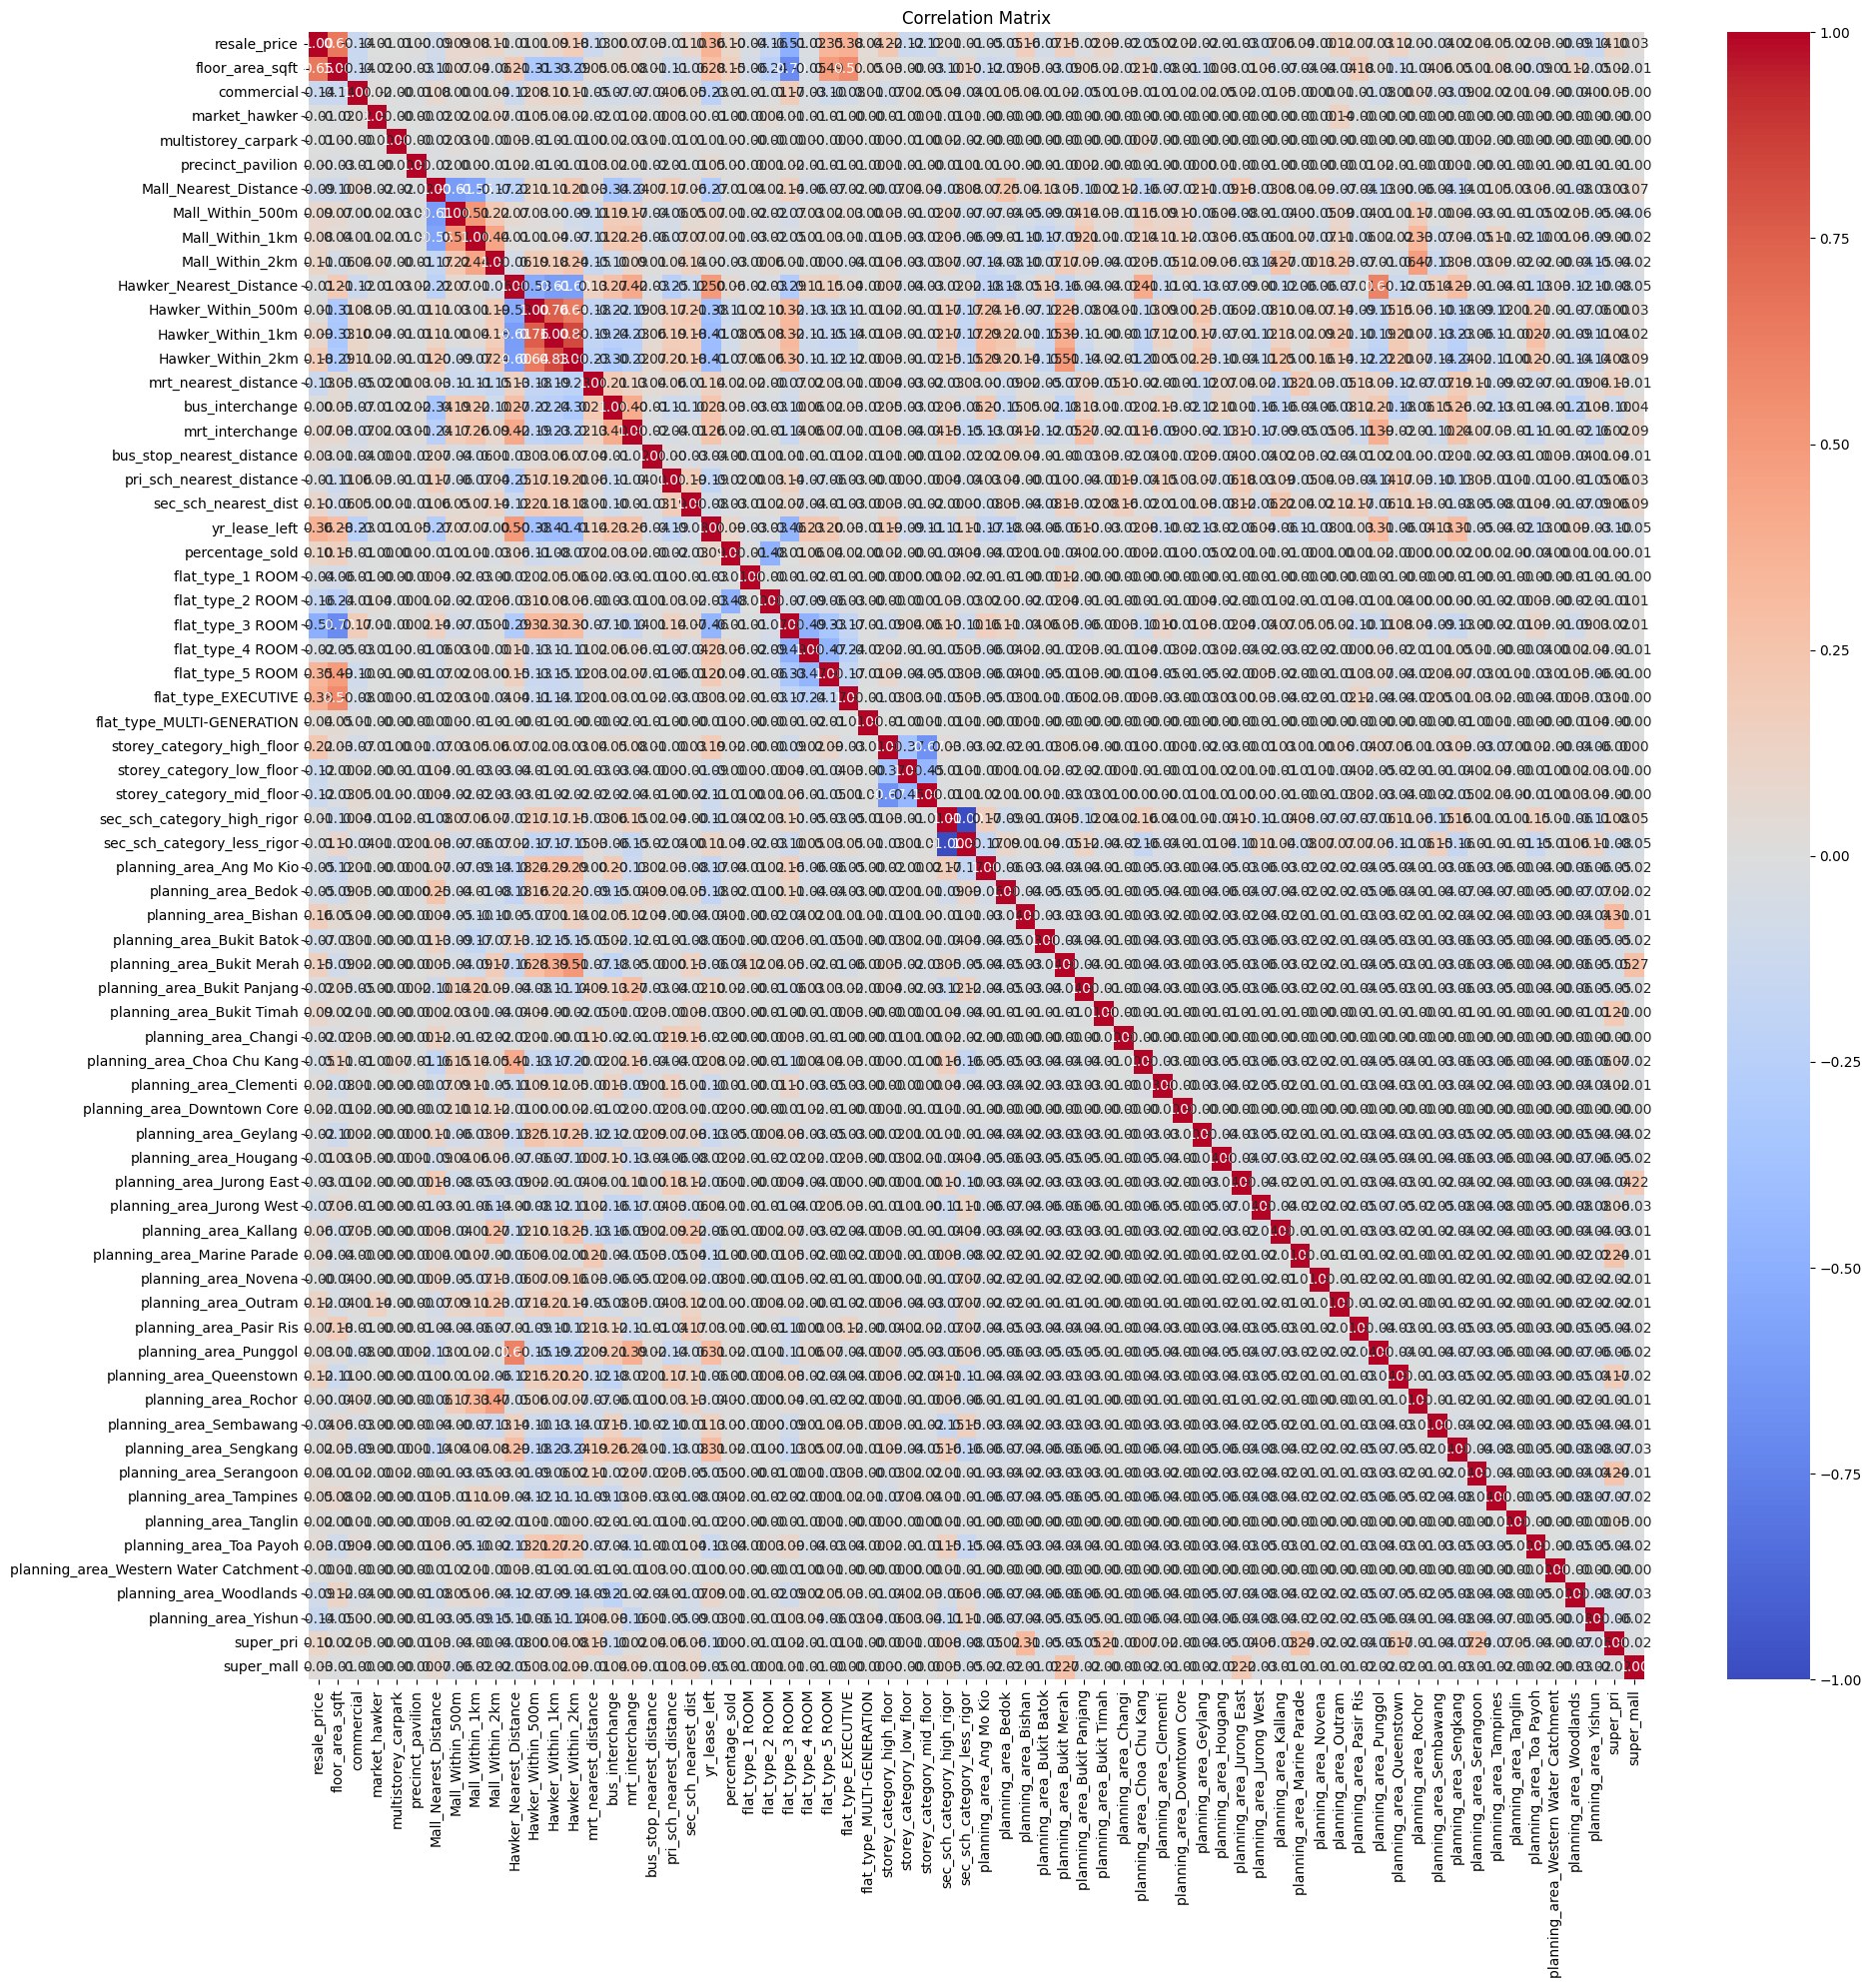

In [150]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Pairplots attached sas seperate document as the runtime is too long

# Pairplot to observe relationship between all variables

sns.pairplot(numeric_hdb)
plt.title("Pairplot - 35 features")
plt.savefig("plot.png")
plt.show()

# Pairplot on non-1/0 values (coloured by `super_mall`)
pairplot_df = numeric_hdb[['resale_price','floor_area_sqft', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance',
                           'mrt_nearest_distance','bus_stop_nearest_distance', 'pri_sch_nearest_distance',
                           'sec_sch_nearest_dist', 'yr_lease_left', 'percentage_sold','super_mall']]


sns.pairplot(pairplot_df, hue='super_mall')
plt.title("Pairplot - 11 features - Super Mall")
plt.savefig("plot_11features-mall.png")
plt.show()

# Pairplot on non-1/0 values (coloured by `super_pri`)
pairplot_df = numeric_hdb[['resale_price','floor_area_sqft', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance',
                           'mrt_nearest_distance','bus_stop_nearest_distance', 'pri_sch_nearest_distance',
                           'sec_sch_nearest_dist', 'yr_lease_left', 'percentage_sold','super_pri']]


sns.pairplot(pairplot_df, hue='super_pri')
plt.title("Pairplot - 11 features")
plt.savefig("plot_11features-pri.png")
plt.show()

<hr>

### Observations

Colinearity between variables are observed to be high for variables related to hawker centres: 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km'. Few variables are also related to malls: 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km'.

Since the variables gives unique perspective to the nearest malls or number of nearby malls, variables are kept. Ensure related variables are not included together in regression model.

From pairplots, relationships between variables do not have observable trends. When coloured by calculated columns of super_pri and super_mall, observed that properties near popular malls do not have noticeable trends but properties near popular schools have noticeable trends. For example, for variables of `mrt_nearest_distance` and `yr_lease_left`, properties near popular schools are observed to be clustered together: they are further away from mrt station, and have lower number of lease years left. 

<hr>

Alternative method for comparison - this is on non- standardised data, and it does not include location.
Using Lasso to get the possible combination of features that can be used in the final model.

In [152]:
# Define X and y
X = numeric_hdb.drop('resale_price', axis=1)
y = numeric_hdb['resale_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Step 1: Fit LassoCV to select features
lasso = LassoCV(cv=5, random_state=123)
lasso.fit(X_train, y_train)

# Step 2: Identify selected features (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Display features
print("\n✅ Lasso-selected features used in final model:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

# Step 3: Train a model using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

final_model = LinearRegression()
final_model.fit(X_train_selected, y_train)

# Step 4: Predict and calculate RMSE
y_pred = final_model.predict(X_test_selected)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R_Square
r_sq_score = r2_score(y_test, y_pred)

print(f"\n✅ Model RMSE (using Lasso-selected features): {rmse:,.2f}")
print(f" Model R-square (using Lasso-selected features): {r_sq_score:,.4f}")


✅ Lasso-selected features used in final model:
1. floor_area_sqft
2. Mall_Nearest_Distance
3. Hawker_Nearest_Distance
4. Hawker_Within_2km
5. mrt_nearest_distance
6. bus_stop_nearest_distance
7. pri_sch_nearest_distance
8. sec_sch_nearest_dist
9. yr_lease_left

✅ Model RMSE (using Lasso-selected features): 76,357.29
 Model R-square (using Lasso-selected features): 0.7192


In [153]:
# 1st Linear Regression model (without standardisation)
#Define X as inputs, y as target variable
X = numeric_hdb.drop(['resale_price'], axis=1)
y = numeric_hdb['resale_price']

# Split testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Define linear regression, fitting training data to model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Using model to predict values
y_pred = linreg.predict(X_test)


# Calculate RMSE
rmse_score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Calculate R_Square
r_sq_score = r2_score(y_test, y_pred)

# Calculate Confidence Interval
df_y_pred = pd.DataFrame(y_pred, columns=['value'])
m, s, n = df_y_pred['value'].mean(), df_y_pred['value'].std(ddof=1), len(df_y_pred)
t = stats.t.ppf(0.975, df=n-1)  # t-value
e = t * (s / np.sqrt(n))  # Margin
ci_lower = m - e
ci_upper = m + e

# Print Summary metrics
print(f"RMSE (test) Score: {rmse_score:,.2f}")
print(f'R_squared Score: {r_sq_score:.4f}')
print(f'Confidence interval: [{ci_lower:,.2f} , {ci_upper:,.2f}]')
print(f'Number of Features: {len(X.columns)}')
print(f'Features used in model: {list(X.columns)}')

RMSE (test) Score: 55,382.34
R_squared Score: 0.8512
Confidence interval: [447,618.31 , 450,296.49]
Number of Features: 67
Features used in model: ['floor_area_sqft', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km', 'mrt_nearest_distance', 'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'yr_lease_left', 'percentage_sold', 'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION', 'storey_category_high_floor', 'storey_category_low_floor', 'storey_category_mid_floor', 'sec_sch_category_high_rigor', 'sec_sch_category_less_rigor', 'planning_area_Ang Mo Kio', 'planning_area_Bedok', 'planning_area_Bishan', 'planning_area_Bukit Batok'

In [154]:
# 2nd Linear Regression model (standardised)
sc = StandardScaler()

# Define X as inputs, y as target variable
X_initial = numeric_hdb.drop(['resale_price'], axis=1)
scaled = sc.fit_transform(X_initial)
X = pd.DataFrame(scaled, columns=X_initial.columns)
y = numeric_hdb['resale_price']

# Split testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Define linear regression, fitting training data to model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Using model to predict values
y_pred = linreg.predict(X_test)

# Calculate RMSE
rmse_score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Calculate R_Square
r_sq_score = r2_score(y_test, y_pred)

# Calculate Confidence Interval
df_y_pred = pd.DataFrame(y_pred, columns=['value'])
m, s, n = df_y_pred['value'].mean(), df_y_pred['value'].std(ddof=1), len(df_y_pred)
t = stats.t.ppf(0.975, df=n-1)  # t-value
e = t * (s / np.sqrt(n))  # Margin
ci_lower = m - e
ci_upper = m + e

# Print Summary metrics
print(f"RMSE (test) Score: {rmse_score:,.2f}")
print(f'R_squared Score: {r_sq_score:.4f}')
print(f'Confidence interval: [{ci_lower:,.2f} , {ci_upper:,.2f}]')
print(f'Number of Features: {len(X.columns)}')

RMSE (test) Score: 55,382.34
R_squared Score: 0.8512
Confidence interval: [447,618.31 , 450,296.49]
Number of Features: 67


<hr>

### Observation

Linear regression model ran on standardised and non standardised inputs showed no difference in RMSE scores.

An alternative model - Random Forest was chosen after further analysis , as the RMSE score is lower.

<hr>

In [155]:
# Alternative Random Forest model
from sklearn.ensemble import RandomForestRegressor
sc = StandardScaler()

forest = RandomForestRegressor(n_estimators=10, random_state=42)

# Define X and y variables
X_initial = numeric_hdb.drop(['resale_price'], axis=1)
scaled = sc.fit_transform(X_initial)
X = pd.DataFrame(scaled, columns=X_initial.columns)
y = numeric_hdb['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Train model
forest.fit(X_train, y_train)

# Using model to predict values
y_pred = forest.predict(X_test)

# Calculate RMSE
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R_Square
r_sq_score = r2_score(y_test, y_pred)

# Calculate Confidence Interval
df_y_pred = pd.DataFrame(y_pred, columns=['value'])
m, s, n = df_y_pred['value'].mean(), df_y_pred['value'].std(ddof=1), len(df_y_pred)
t = stats.t.ppf(0.975, df=n-1)  # t-value
e = t * (s / np.sqrt(n))  # Margin
ci_lower = m - e
ci_upper = m + e

# Print Summary metrics
print(f"RMSE (test) Score: {rmse_score:,.2f}")
print(f'R_squared Score: {r_sq_score:.4f}')
print(f'Confidence interval: [{ci_lower:,.2f} , {ci_upper:,.2f}]')
print(f'Number of Features: {len(X.columns)}')

RMSE (test) Score: 28,975.55
R_squared Score: 0.9593
Confidence interval: [447,560.12 , 450,415.12]
Number of Features: 67


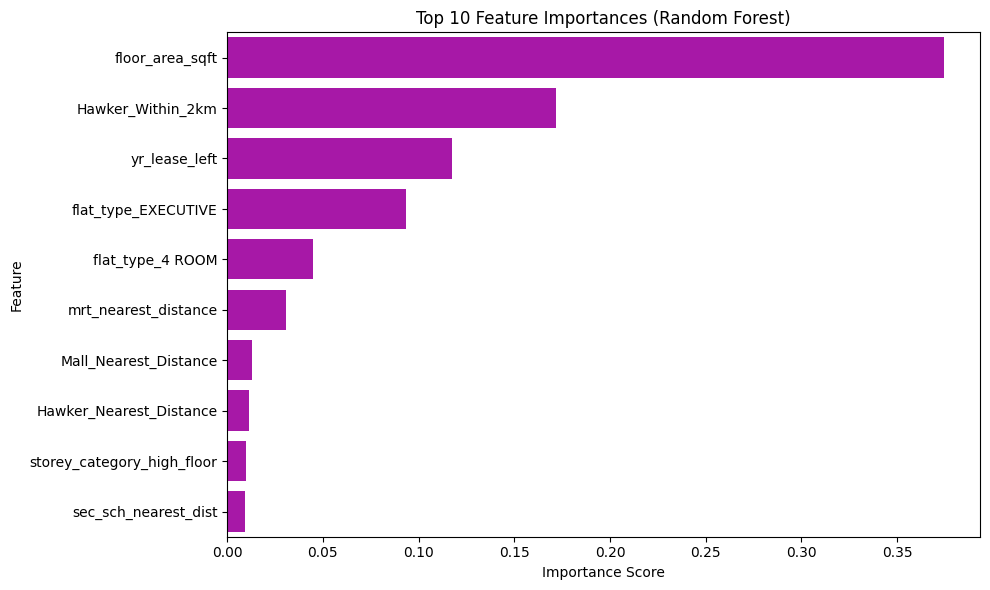

In [156]:
# Rank 10 most important features
# Define feature
importances = forest.feature_importances_
features = X.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), color='m')

# Customise axes labels and title
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Customise graph
plt.tight_layout()

# Print plot
plt.savefig('Graph_Top 10 features.png', dpi=500)
plt.show()

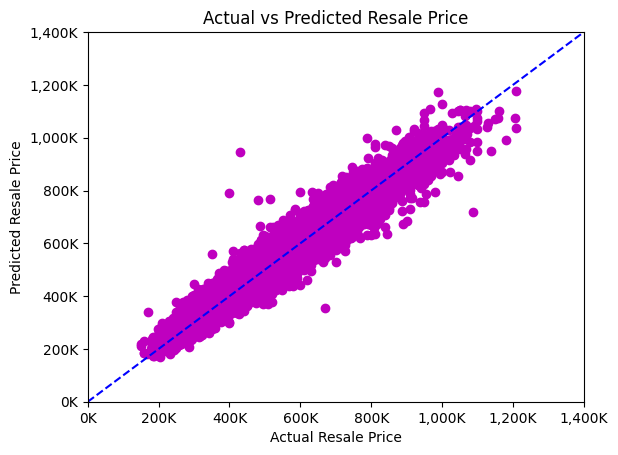

In [157]:
# Plot predicted y with actual y
# Define points used for reference line
x1, x2 = [1, 10]
y1, y2 = [1, 10]

#Define plot variables
plt.scatter(y_test, y_pred, color='m')

# Customise axes lables and title
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Price')

# Customise tick marks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(200000))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(200000))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

# Customise tick limits
plt.xlim(0, 1400000)
plt.ylim(0, 1400000)

# Plot reference line
plt.axline((x1, y1), (x2, y2),color='b', linestyle='--')

# Print plot
plt.savefig('Graph_Predicted on Actual.png', dpi=500)
plt.show()

The closer the points are to the dashed line, the better the model is at predicting the target variable, resale prices. 

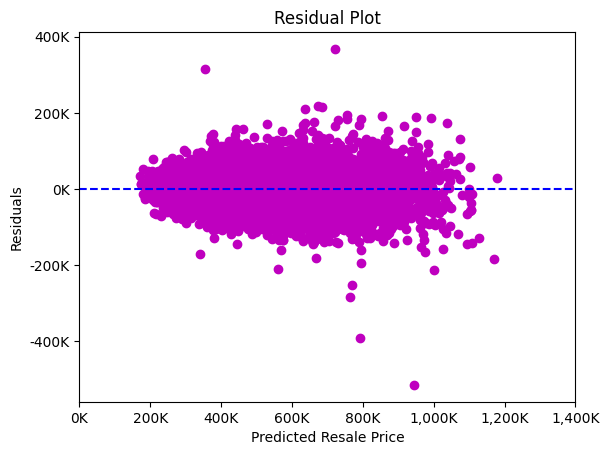

In [158]:
# Plot residuals
residuals = y_test - y_pred

# Plot scatter plot
plt.scatter(y_pred, residuals, color='m')

# Customise axes lables and title
plt.xlabel('Predicted Resale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Customise tick marks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(200000))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

# Customise tick limits
plt.xlim(0, 1400000)

# Plot reference line
plt.axhline(y=0, color='b', linestyle='--')

# Print graph
plt.savefig('Graph_Residual predicted.png', dpi=500)
plt.show()

The nearer the points are to the line, the better the model. Residual is the difference between actual value and predicted value. A residual value of 0 means that the predicted value is the same as the actual value. For a linear regression model, this would be the vertical straight distance between the predicted value on the scatterplot to the point on the regression line. Since the model used here cannot be plotted like in a linear regression model, the residual plot is used to show this differences in values.

The dispersion on the residual plot also shows homoscedasticity. This means that the values in the dataset has a constant variance. As homoscedasticity is an assumption of regression models, the residual plot affirms that this assumption holds true for this dataset. The opposite of homoscedasticity is heteroscedasticity, and the pattern observed would be points being close together when predicted prices are low, and the points are dispersed and far from each other when predicted prices are large. 

Repeat steps to standardise the test data.

In [160]:
# Load test dataset
hdb_test=pd.read_csv('test.csv')

C:\Users\Dora Tay\AppData\Local\Temp\ipykernel_23880\3102443866.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb_test=pd.read_csv('test.csv')


In [161]:
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [162]:
hdb_test.isnull().sum().sort_values(ascending=False)

Hawker_Within_500m           10755
Mall_Within_500m             10292
Hawker_Within_1km             6729
Hawker_Within_2km             3254
Mall_Within_1km               2786
Mall_Within_2km                213
Mall_Nearest_Distance           84
street_name                      0
id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
mid_storey                       0
Tranc_Month                      0
Tranc_Year                       0
lease_commence_date              0
flat_model                       0
floor_area_sqm                   0
storey_range                     0
lower                            0
max_floor_lvl                    0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age             

In [163]:
# Impute '0' for columns with null values 
hdb_test['Hawker_Within_500m'] = hdb_test['Hawker_Within_500m'].fillna(0)
hdb_test['Mall_Within_500m'] = hdb_test['Mall_Within_500m'].fillna(0)
hdb_test['Hawker_Within_1km'] = hdb_test['Hawker_Within_1km'].fillna(0)
hdb_test['Hawker_Within_2km'] = hdb_test['Hawker_Within_2km'].fillna(0)
hdb_test['Mall_Within_1km'] = hdb_test['Mall_Within_1km'].fillna(0)
hdb_test['Mall_Within_2km'] = hdb_test['Mall_Within_2km'].fillna(0)
hdb_test['Mall_Nearest_Distance'] = hdb_test['Mall_Nearest_Distance'].fillna(0)

In [164]:
# Check if any null values observed
hdb_test.isnull().sum().sort_values(ascending=False)

id                           0
Tranc_YearMonth              0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
Tranc_Year                   0
Tranc_Month                  0
mid_storey                   0
lower                        0
upper                        0
mid                          0
full_flat_type               0
address                      0
floor_area_sqft              0
price_per_sqft               0
hdb_age                      0
max_floor_lvl                0
year_completed               0
residential                  0
commercial                   0
market_hawker                0
multistorey_carpark          0
precinct_pavilion            0
total_dwelling_units         0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_so

In [165]:
# Calculate column for yr_lease_left
hdb_test['yr_lease_used'] = hdb_test['Tranc_Year']-hdb_test['lease_commence_date']
hdb_test['yr_lease_left'] = 99 - hdb_test['yr_lease_used']

In [166]:
# Calculate column for percentage of sold units
# Using '1/2/3/4/5room_sold' and exec_sold, and multigen_sold, studio_apartment_sold 
# Sum of all / total_dwelling_units
hdb_test['sum_sold'] = hdb_test['1room_sold']+hdb_test['2room_sold']+hdb_test['3room_sold']+hdb_test['4room_sold']+hdb_test['5room_sold']+hdb_test['exec_sold']+hdb_test['multigen_sold']+hdb_test['studio_apartment_sold']

hdb_test['percentage_sold'] = hdb_test['sum_sold'] / hdb_test['total_dwelling_units']
hdb_test['percentage_sold'] = hdb_test['percentage_sold'].round(4)

In [167]:
# Check percentage_sold
print(hdb_test['percentage_sold'].unique())
print(hdb_test['percentage_sold'].describe())

[1.     0.9862 0.8387 0.9762 0.9959 0.9809 0.9674 0.9832 0.9961 0.9934
 0.9924 0.9958 0.982  0.9917 0.9965 0.9946 0.9842 0.3737 0.9899 0.9973
 0.6023 0.9979 0.9962 0.9904 0.9949 0.9947 0.9784 0.9188 0.25   0.9819
 0.993  0.9905 0.9944 0.9804 0.9939 0.3792 0.9906 0.625  0.9915 0.9953
 0.9667 0.963  0.9831 0.9868 0.7094 0.9952 0.9916 0.99   0.9886 0.9846
 0.975  0.9923 0.9956 0.9892 0.8938 0.2906 0.51   0.9828 0.994  0.1303
 0.55   0.3682 0.9948 0.9931 0.3688 0.9789 0.9869 0.8125 0.9935 0.9864
 0.9888 0.9919 0.1325 0.9898 0.2938 0.9943 0.9942 0.9823 0.991  0.5429
 0.6322 0.9712 0.9929 0.8889 0.9922 0.9221 0.4928 0.9873 0.973  0.9914
 0.9818 0.9744 0.9815 0.9938 0.9951 0.9833 0.375  0.9932 0.9858 0.9894
 0.9957 0.9954 0.9798 0.5195 0.9941 0.9882 0.3352 0.1649 0.9895 0.9911
 0.9928 0.95   0.2381 0.9777 0.45   0.9716 0.9933 0.2024 0.9722 0.9808
 0.475  0.9897 0.907  0.0593 0.9908 0.9936 0.256  0.3681 0.9875 0.98
 0.6547 0.9084 0.972  0.2841 0.7368 0.9909 0.9785 0.3625 0.1577 0.9318
 0.9783 

In [168]:
# Place storey_range, using upper into bins
# Using storey_range, 04 to 06 is most frequent, using upper, 75th percentile is 12 storey.
def storey_bin(row):
    if row['upper'] < 6:
        return "low_floor"
    elif row['upper'] < 12:
        return "mid_floor"
    else:
        return "high_floor"
hdb_test['storey_category'] = hdb_test.apply(storey_bin, axis=1)

In [169]:
# Place cutoff_point into bins
# 210 is mean for cutoff_point
def cutoff_bin(row):
    if row['cutoff_point'] < 210:
        return "less_rigor"
    else:
        return "high_rigor"
hdb_test['sec_sch_category'] = hdb_test.apply(cutoff_bin, axis=1)

In [170]:
# Drop columns that are not required for linear regression
hdb_test.drop(['town','block','street_name','flat_model','mid_storey','lower','upper','mid','full_flat_type',
'address','hdb_age','year_completed','residential','1room_rental','2room_rental','3room_rental', 
'other_room_rental','hawker_food_stalls','hawker_market_stalls','mrt_name','mrt_latitude',
'mrt_longitude','bus_stop_name','bus_stop_latitude','bus_stop_longitude','vacancy',
'pri_sch_affiliation','pri_sch_latitude','pri_sch_longitude','sec_sch_name','affiliation',
'sec_sch_latitude','sec_sch_longitude','storey_range','cutoff_point','price_per_sqft'], axis=1, inplace=True)


In [171]:
# Drop columns used for calculated columns that are not required for linear regression
hdb_test.drop(['sum_sold', 'Tranc_YearMonth','floor_area_sqm','lease_commence_date','Tranc_Year',
'Tranc_Month','max_floor_lvl','total_dwelling_units','1room_sold','2room_sold','3room_sold','4room_sold',
'5room_sold','exec_sold','multigen_sold','studio_apartment_sold'], axis=1, inplace=True)

In [172]:
# Observe dataset again after cleaning
hdb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   flat_type                  16737 non-null  object 
 2   floor_area_sqft            16737 non-null  float64
 3   commercial                 16737 non-null  object 
 4   market_hawker              16737 non-null  object 
 5   multistorey_carpark        16737 non-null  object 
 6   precinct_pavilion          16737 non-null  object 
 7   postal                     16737 non-null  object 
 8   Latitude                   16737 non-null  float64
 9   Longitude                  16737 non-null  float64
 10  planning_area              16737 non-null  object 
 11  Mall_Nearest_Distance      16737 non-null  float64
 12  Mall_Within_500m           16737 non-null  float64
 13  Mall_Within_1km            16737 non-null  flo

In [173]:
# One hot encoding for `flat_type`
encoder_flat_type = OneHotEncoder(sparse_output=False)
encoded_flat_type = encoder_flat_type.fit_transform(hdb_test[['flat_type']])
encoded_df_flat_type = pd.DataFrame(encoded_flat_type, columns=encoder_flat_type.get_feature_names_out(['flat_type']))

In [174]:
# One hot encoding for `storey_category`
encoder_storey_type = OneHotEncoder(sparse_output=False)
encoded_storey_type = encoder_storey_type.fit_transform(hdb_test[['storey_category']])
encoded_df_storey_type = pd.DataFrame(encoded_storey_type, columns=encoder_storey_type.get_feature_names_out(['storey_category']))

In [175]:
# One hot encoding for `sec_sch_category`
encoder_sec_sch_type = OneHotEncoder(sparse_output=False)
encoded_sec_sch_type = encoder_sec_sch_type.fit_transform(hdb_test[['sec_sch_category']])
encoded_df_sec_sch_type = pd.DataFrame(encoded_sec_sch_type, columns=encoder_sec_sch_type.get_feature_names_out(['sec_sch_category']))

In [176]:
# One hot encoding for `planning_area`
encoder_area_type = OneHotEncoder(sparse_output=False)
encoded_area_type = encoder_area_type.fit_transform(hdb_test[['planning_area']])
encoded_df_area_type = pd.DataFrame(encoded_area_type, columns=encoder_area_type.get_feature_names_out(['planning_area']))

In [177]:
# Converting columns with values Y/N to 1/0
hdb_test['commercial'] = hdb_test['commercial'].map({'Y': 1, 'N': 0})
hdb_test['market_hawker'] = hdb_test['market_hawker'].map({'Y': 1, 'N': 0})
hdb_test['multistorey_carpark'] = hdb_test['multistorey_carpark'].map({'Y': 1, 'N': 0})
hdb_test['precinct_pavilion'] = hdb_test['precinct_pavilion'].map({'Y': 1, 'N': 0})

In [178]:
# Merge dataframes after encoding categorical data
hdb_test_df = pd.concat([hdb_test, encoded_df_flat_type,encoded_df_storey_type,encoded_df_sec_sch_type,encoded_df_area_type], axis=1)

# Drop original categories
hdb_test_df.drop(['flat_type', 'storey_category', 'sec_sch_category','planning_area'], axis=1, inplace=True)


In [179]:
# List of schools considered as top schools
top_list = ['Ai Tong School','Holy Innocents Primary School','Nanyang Primary School','Nan Hua Primary School',
            'St. Hilda Primary School','Catholic High School','CHIJ St. Nicholas Girls School',
            'Singapore Chinese Girls Primary School','Rulang Primary School','Methodist Girls School',
            'Tao Nan School','Pei Hwa Presbyterian Primary School','Rosyth School',
            'Fairfield Methodist School','Anglo-Chinese School','Henry Park Primary School',
            'Red Swastika School','South View Primary School','Anglo-Chinese School',
            'Raffles Girls Primary School']

# Query to format list
query = '|'.join(top_list)

# Super school column created to match `pri_sch_name` with `top_list`
hdb_test_df['super_pri'] = hdb_test_df['pri_sch_name'].str.contains(query)

In [180]:
# Convert `super_pri`
hdb_test_df['super_pri'] = hdb_test_df['super_pri'].astype(int)

In [181]:
def calculate_nearest_mall_info(hdb_test_coords, mall_coords):
    mall_tree = cKDTree(mall_coords)
    distances, indices = mall_tree.query(hdb_test_coords, k=1)
    return distances, indices

# Initalise list of HDB and mall coordinates
hdb_test_coords = list(zip(hdb_test['Latitude'], hdb_test['Longitude']))

# Calculate nearest mall info
distances, indices = calculate_nearest_mall_info(hdb_test_coords, mall_coords)

# Add to HDB dataframe
hdb_test_df['nearest_mall_distance'] = distances

# Get mall names or IDs from `mall` DataFrame using the indices
hdb_test_df['nearest_mall_name'] = mall.iloc[indices]['Mall Name'].values
hdb_test_df['nearest_super'] = mall.iloc[indices]['>4.4 reviews, and 10K ratings (on google)'].values

# Show result
hdb_test_df[['id', 'nearest_mall_name', 'nearest_mall_distance','nearest_super']].sort_values(by=['nearest_super'], ascending=False)

,id,nearest_mall_name,nearest_mall_distance,nearest_super
9446,80742,IMM,0.007946,Y
9055,890,VivoCity,0.015357,Y
16591,184065,IMM,0.003134,Y
5852,31698,VivoCity,0.008503,Y
687,126709,IMM,0.006278,Y
...,...,...,...,...
5611,14522,HDB Hub,0.008401,N
5612,132870,Gek Poh Shopping Centre,0.003072,N
5613,78370,Thomson Plaza,0.004937,N
5614,19284,The Clementi Mall,0.005585,N


In [182]:
# Convert `nearest_super` to 1/0
hdb_test_df['super_mall'] = hdb_test_df['nearest_super'].map({'Y': 1, 'N': 0})

In [183]:
# Show result
hdb_test_df[['id', 'nearest_mall_name','nearest_super','super_mall']].sort_values(by=['nearest_super'], ascending=False)

,id,nearest_mall_name,nearest_super,super_mall
9446,80742,IMM,Y,1
9055,890,VivoCity,Y,1
16591,184065,IMM,Y,1
5852,31698,VivoCity,Y,1
687,126709,IMM,Y,1
...,...,...,...,...
5611,14522,HDB Hub,N,0
5612,132870,Gek Poh Shopping Centre,N,0
5613,78370,Thomson Plaza,N,0
5614,19284,The Clementi Mall,N,0


In [184]:
# Convert 'Hawker_Within_500m' column to integer type
hdb_test_df['Hawker_Within_500m'] = hdb_test_df['Hawker_Within_500m'].astype(int)

# Verify the change
print(hdb_test_df['Hawker_Within_500m'].dtype)
print(hdb_test_df['Hawker_Within_500m'].unique())

int64
[0 1 3 2 4 5]


In [185]:
# Inspect dataframe to choose columns to drop
hdb_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 76 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     16737 non-null  int64  
 1   floor_area_sqft                        16737 non-null  float64
 2   commercial                             16737 non-null  int64  
 3   market_hawker                          16737 non-null  int64  
 4   multistorey_carpark                    16737 non-null  int64  
 5   precinct_pavilion                      16737 non-null  int64  
 6   postal                                 16737 non-null  object 
 7   Latitude                               16737 non-null  float64
 8   Longitude                              16737 non-null  float64
 9   Mall_Nearest_Distance                  16737 non-null  float64
 10  Mall_Within_500m                       16737 non-null  float64
 11  Ma

In [186]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_hdb_test = hdb_test_df.select_dtypes(include=['float64', 'int64'])

# Drop `id`, `Longitude`, `Latitude`,`nearest_mall_distance`, `yr_lease_used`
columns_to_exclude = ['id', 'Longitude','Latitude','nearest_mall_distance','yr_lease_used']  
numeric_hdb_test = numeric_hdb_test.drop(columns=columns_to_exclude, errors='ignore')

In [187]:
# Define X variables
X_initial = numeric_hdb_test
scaled = sc.fit_transform(X_initial)
X = pd.DataFrame(scaled, columns=X_initial.columns)

# Using model to predict values
y_test_pred = forest.predict(X)

# Print Summary metrics
print(y_test_pred.shape)

(16737,)


### Observation

In [188]:
# Print `y_pred_test` with id

y_df = pd.DataFrame(y_test_pred)

y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16737 non-null  float64
dtypes: float64(1)
memory usage: 130.9 KB


In [189]:
hdb_test_df['y_pred'] = y_df[0]

pred_df = hdb_test_df[['id', 'y_pred']]

pred_df

,id,y_pred
0,114982,371300.000000
1,95653,475060.000000
2,40303,352720.000000
3,109506,321500.000000
4,100149,400300.000000
...,...,...
16732,23347,369300.000000
16733,54003,500522.133333
16734,128921,360425.866667
16735,69352,440046.666667


In [190]:
pred_df.columns = ['Id','Predicted']
pred_df = pred_df.round(2)
print (pred_df)

           Id  Predicted
0      114982  371300.00
1       95653  475060.00
2       40303  352720.00
3      109506  321500.00
4      100149  400300.00
...       ...        ...
16732   23347  369300.00
16733   54003  500522.13
16734  128921  360425.87
16735   69352  440046.67
16736  146210  414000.00

[16737 rows x 2 columns]


In [191]:
pred_df.to_csv('resale_price.csv', index=False)